# Strain test with rods

In this script, we perform a series of numerical tests. In particular, we calculate the strain tensor for elementary deformations of a cylindrical rod. We compare the corresponding results to simple analytical expressions

## Twist

We begin by considering a twist deformation. We thus generate a rod, and deform it with parameter ``0.22``, which means that, over the default height of ``180`` there is a twist of $\pi$

In [1]:
import fsa.spatial as spatial

xyz = spatial.generate_rod(ds=2.8)
rtz = spatial.coordinates_to_polar(xyz)

d0 = 0.01745 #* 10 # with a larger twist non-lin overtakes, and principal axis is biased towards Z
xyz_d = spatial.deform(xyz, method='twist', d=d0)

We do a 3D plot of the reference (blue) and deformed (red) configurations

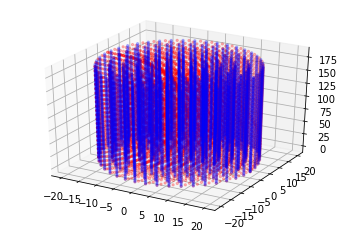

In [4]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xyz[:,0], xyz[:,1], xyz[:,2],
           alpha=.25, s=5, color='blue')

ax.scatter(xyz_d[:,0], xyz_d[:,1], xyz_d[:,2],
           alpha=.25, s=5, color='red')
plt.show()

And we directly calculate the deformation gradient

In [5]:
import fsa.elastic as elastic

weights = elastic.average_weights([xyz_d,
                                   xyz_d])

F = elastic.deformation_gradient(weights,
                                 xyz,
                                 xyz_d)

And, from it, the rotation angle and lagrange strain tensor

In [6]:
rot_angle, rot_axis = elastic.rotations(F)
_, gam = elastic.lagrange_strain(F)

After transforming the coordinates to polar, we make a scatter plot that shows the rotation angle increasing linearly from zero at the base to around $\pi$ at the top of the cylinder.

The base/tip asymmetry reflects the asymemtry of displacements, which translates in numerical disagreements and disagreements in the weight matrix.

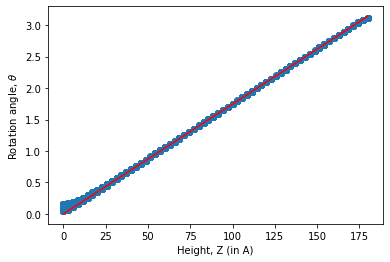

In [7]:
import numpy as np

z = np.linspace(0, 180, 180)
plt.scatter(xyz[:,2],
            np.array(rot_angle))
plt.plot(z, z*d0, color='red')
plt.xlabel('Height, Z (in A)')
plt.ylabel('Rotation angle, $\\theta$')
plt.show()

We can also study the different components of the strain tensor, and compare them with analytical results

In [12]:
gam_cyl = spatial.tensor_to_polar(xyz, gam)

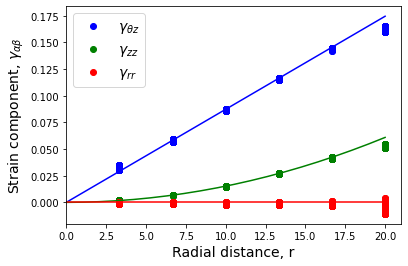

In [13]:
r = np.linspace(0, 20, 20)

plt.plot(r, d0 * r/2,
         color='blue')
plt.scatter(rtz[:, 0],
           gam_cyl[:,1,2],
           label='$\\gamma_{\\theta z}$',
           color='blue')

plt.plot(r, (d0 * r)**2/2,
         color='green')
plt.scatter(rtz[:, 0],
           gam_cyl[:,2,2],
           label='$\\gamma_{z z}$',
           color='green')

plt.plot(r, 0 * r,
         color='red')
plt.scatter(rtz[:, 0],
           gam_cyl[:,0,0],
           label='$\\gamma_{r r}$',
           color='red')
plt.xlim([0, 21])
plt.xlabel('Radial distance, r', fontsize=14)
plt.ylabel('Strain component, $\\gamma_{\\alpha\\beta}$', fontsize=14)
plt.legend(fontsize=14)
plt.show()

Finally, we calculate the principal stretches and their axis. In particular, we have analytical expressions for the principal stretches

In [14]:
stretches, stretch_axis = elastic.principal_stretches_from_g(gam)

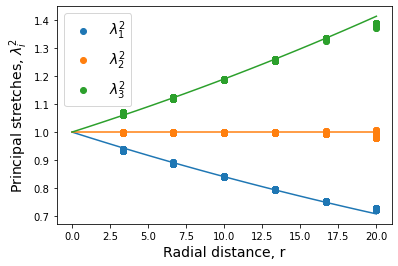

In [15]:
al = r * d0

plt.plot(r, .5 * (2 + al**2 - al * np.sqrt(4+al**2)))
plt.scatter(rtz[:, 0],
            np.real(stretches[:,0]),
           label='$\\lambda_1^2$')

plt.plot(r, r*0 + 1)
plt.scatter(rtz[:, 0],
            np.real(stretches[:,1]),
           label='$\\lambda_2^2$')

plt.plot(r, .5 * (2 + al**2 + al * np.sqrt(4+al**2)))
plt.scatter(rtz[:, 0],
            np.real(stretches[:,2]),
           label='$\\lambda_3^2$')

plt.xlabel('Radial distance, r', fontsize=14)
plt.ylabel('Principal stretches, $\\lambda_{i}^2$', fontsize=14)
plt.legend(fontsize=14)

plt.show()

We also have a result for the principal axis. We explore the third axis, which corresponds to largest deformations, in cylindrical coordinates. In particular, we will use the values of the coordinates squared, as there is an arbitrary global sign for the vecots

In [16]:
axis_cyl = spatial.vector_to_polar(xyz, stretch_axis[2])

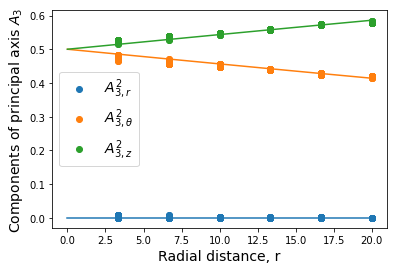

In [17]:
Rt = .5 * (-al + np.sqrt(4 + al**2))
Rnorm = np.sqrt(1 + (0.5 * (-al + np.sqrt(4 + al**2)) )**2 )

plt.plot(r, 0. * r)
plt.scatter(rtz[:, 0],
            axis_cyl[:, 0]**2,
            label='$A_{3,r}^2$')

plt.plot(r, (Rt / Rnorm)**2)
plt.scatter(rtz[:, 0],
            axis_cyl[:, 1]**2,
            label='$A_{3,\\theta}^2$')

plt.plot(r, 0. * r + 1 / Rnorm**2)
plt.scatter(rtz[:, 0],
            axis_cyl[:, 2]**2,
            label='$A_{3,z}^2$')

plt.xlabel('Radial distance, r', fontsize=14)
plt.ylabel('Components of principal axis $A_{3}$', fontsize=14)
plt.legend(fontsize=14)
plt.show()

## Radial extension

A radial extension is a very simple deformation. We load the same rod as before, and apply a radial deformatoin with parameter ``0.5``, which corresponds to a fifty per cent radial increase.

In [18]:
xyz = spatial.generate_rod(ds=2.8)
d0 = 0.5
xyz_d = spatial.deform(xyz, method='radial', d=d0)

In 3D we can see the radial extension easily

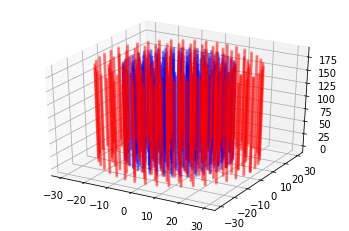

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xyz[:,0], xyz[:,1], xyz[:,2],
           alpha=.25, s=5, color='blue')

ax.scatter(xyz_d[:,0], xyz_d[:,1], xyz_d[:,2],
           alpha=.25, s=5, color='red')

plt.show()

We will now only use the strain tensor

In [22]:
weights = elastic.average_weights([xyz,
                                   xyz_d])

F = elastic.deformation_gradient(weights,
                                 xyz,
                                 xyz_d)
_, gam = np.array(elastic.lagrange_strain(F))

The analytical prediction is that the radial and angular strain components are equal, and given by $d+d^2/2$. The other diagonal term is null (as are all the other components of strain)

In [27]:
print([np.mean(gam[:,0,0]), np.mean(gam[:,1,1]), np.mean(gam[:,2,2])])
print([d0 + d0**2 /2, d0 + d0**2 /2, 0])

[0.625, 0.625, 5.1188335260012275e-33]
[0.625, 0.625, 0]


## Spin

We now consider a deformation in which the angle changes with the radius. We refer to this as spin, and is invariant in the vertical direction. A deformation parameter of ``d0=0.157`` corresponds to half a rotation within the radius

In [29]:
xyz = spatial.generate_rod(r0=80., z0=20., ds=4)
rtz = spatial.coordinates_to_polar(xyz)

d0 = 0.02 #* 10 # with a larger twist non-lin overtakes, and principal axis is biased towards Z
xyz_d = spatial.deform(xyz, method='spin', d=d0)
rtz_d = spatial.coordinates_to_polar(xyz_d)

We do a 3D plot of the reference (blue) and deformed (red) configurations

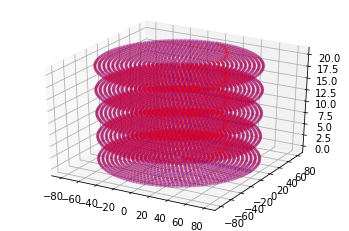

In [31]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xyz[:,0], xyz[:,1], xyz[:,2],
           alpha=.25, s=5, color='blue')

ax.scatter(xyz_d[:,0], xyz_d[:,1], xyz_d[:,2],
           alpha=.25, s=5, color='red')
plt.show()

And we directly calculate the deformation gradient

In [32]:
weights = elastic.average_weights([xyz,
                                   xyz_d],
                                  parameters=[6., 8.])

F = elastic.deformation_gradient(weights,
                                 xyz,
                                 xyz_d)

And, from it, the lagrange strain tensor, for which we have some results

In [33]:
rot_angle, rot_axis = elastic.rotations(F)
_, gam = elastic.lagrange_strain(F)
gam_cyl = spatial.tensor_to_polar(xyz, gam)

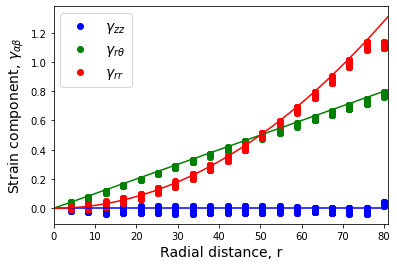

In [34]:
r = np.linspace(0, 81, 81)

plt.plot(r, 0 * r,
         color='blue')
plt.scatter(rtz[:, 0],
           gam_cyl[:,1,1],
           label='$\\gamma_{z z}$',
           color='blue')

plt.plot(r, d0 * r/2,
         color='green')
plt.scatter(rtz[:, 0],
           gam_cyl[:,0,1],
           label='$\\gamma_{r \\theta}$',
           color='green')

plt.plot(r, (d0 * r)**2/2,
         color='red')
plt.scatter(rtz[:, 0],
           gam_cyl[:,0,0],
           label='$\\gamma_{r r}$',
           color='red')
plt.xlim([0, 81])
plt.xlabel('Radial distance, r', fontsize=14)
plt.ylabel('Strain component, $\\gamma_{\\alpha\\beta}$', fontsize=14)
plt.legend(fontsize=14)
plt.show()

## Noise

We now study the effect of noise. To do so, we add noise to the reference configuration and to the deformed configuration. In this case, there is no signal

In [30]:
from tools import spatial
reload(spatial)
xyz = spatial.generate_rod(ds=2.8)
#xyz = spatial.generate_cube(r0=20, ds = 1.)
#xyz = spatial.generate_sphere(r0=20, ds=1.5)
xyz_d = spatial.noise(xyz, 1.)
xyz = spatial.noise(xyz, 1.)
rtz = spatial.coordinates_to_polar(xyz)
rtp = spatial.coordinates_to_polar(xyz)

We plot the results, as before

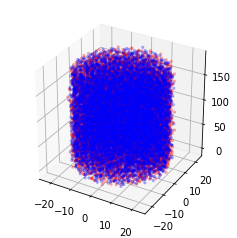

In [31]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xyz[:,0], xyz[:,1], xyz[:,2],
           alpha=.25, s=5, color='blue')

ax.scatter(xyz_d[:,0], xyz_d[:,1], xyz_d[:,2],
           alpha=.25, s=5, color='red')

ax.axis('scaled')
plt.show()

Calculate the deformation gradients

In [32]:
from tools import elastic

weights = elastic.average_weights([xyz,
                                   xyz_d],
                                  method='linear',
                                  parameters=[5,5.1])
F = elastic.deformation_gradient(weights,
                                 xyz,
                                 xyz_d) # 43.3 secs. o2 for lin sol, 76 secs, 140 secs without new inv.

We compute the rotations. As one can see, the rotation angle is distributed around a small value

In [33]:
reload(elastic)
rot_angle, rot_axis = elastic.rotations(F)

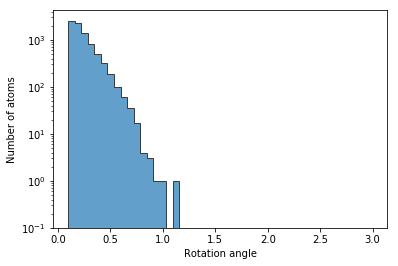

In [34]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0.1, np.pi, 50)

plt.hist(np.array(rot_angle), x,
         log=True,
         alpha=0.7,
         histtype='stepfilled', ec='k')

plt.xlim([-0.05, np.pi])
plt.xlabel('Rotation angle')
plt.ylabel('Number of atoms')
plt.show()

The rotation axis are distributed homogeneously

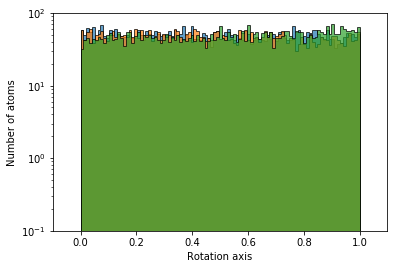

In [47]:
import numpy as np

rot_axis_rtp = spatial.coordinates_to_spherical(np.array(rot_axis))

x = np.linspace(-np.pi, np.pi, 100)

x = np.linspace(0, 1, 100)
plt.hist(np.array(rot_axis)[:, 0], x,
         alpha=0.7, log=True,
         histtype='stepfilled', ec='k')
plt.hist(np.array(rot_axis)[:, 1], x,
         alpha=0.7, log=True,
         histtype='stepfilled', ec='k')
plt.hist(np.array(rot_axis)[:, 2], x,
         alpha=0.7, log=True,
         histtype='stepfilled', ec='k')

plt.xlim([-.1, 1.1])
plt.xlabel('Rotation axis')
plt.ylabel('Number of atoms')

plt.show()

The axis are distributed in the unit sphere, as can be seen in this scatter plot of their components

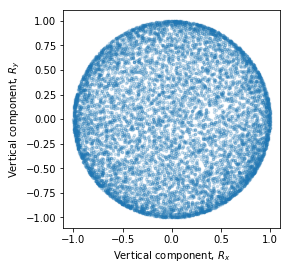

In [52]:
plt.scatter(x=np.array(rot_axis)[:,0],
            y=np.array(rot_axis)[:,1],
            s=6, alpha=.2)

plt.xlabel('Vertical component, $R_{x}$')
plt.ylabel('Vertical component, $R_{y}$')
plt.axis('scaled')
plt.show()

There are clearly no correlations between the rotation angle and the axis of rotation, see here a scatter plot for the z-component

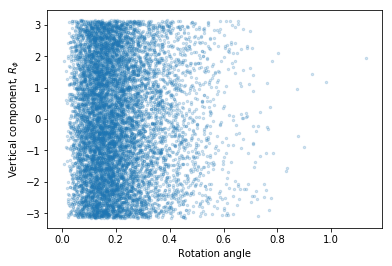

In [55]:
plt.scatter(x=np.array(rot_angle)[:],
            y=rot_axis_rtp[:, 2],
            s=6, alpha=.2)

plt.xlabel('Rotation angle')
plt.ylabel('Vertical component, $R_{\\phi}$')
plt.show()

We now study the strain. In particular, we focus on the principal stretches

In [56]:
reload(elastic)
_, gam = elastic.lagrange_strain(F)
stretches, axes = elastic.principal_stretches_from_g(gam)
axis_1, axis_2, axis_3 = axes[0], axes[1], axes[2]

The stretches correspond to the square root of the lambda's

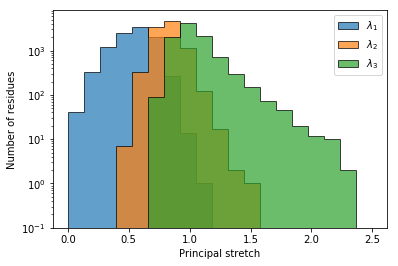

In [72]:
x = np.linspace(0, 2.5, 20)
plt.hist(np.sqrt(stretches[:,0]), x,
         alpha=0.7, log=True,
         histtype='stepfilled', ec='k', label='$\lambda_1$')
plt.hist(np.sqrt(stretches[:,1]), x,
         alpha=0.7, log=True,
         histtype='stepfilled', ec='k', label='$\lambda_2$')
plt.hist(np.sqrt(stretches[:,2]), x,
         alpha=0.7, log=True,
         histtype='stepfilled', ec='k', label='$\lambda_3$')

plt.xlabel('Principal stretch')
plt.ylabel('Number of residues')
plt.legend()

plt.show()

The principal axes are also distributed in the unit sphere. To see this, we can transform them to spherical coordinates and make hitograms

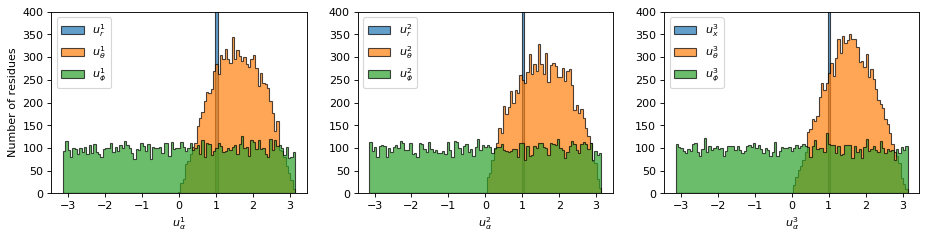

In [82]:
fig = plt.figure(num=None,
                 figsize=(14, 3),
                 dpi=80)
x = np.linspace(-np.pi, np.pi, 100)

ax1 = fig.add_subplot(1,3,1)
ax1.hist(axis_1_rtp[:, 0],
         x, alpha=0.7,
         histtype='stepfilled', ec='k', label='$u^1_r$')
ax1.hist(axis_1_rtp[:, 1],
         x, alpha=0.7,
         histtype='stepfilled', ec='k', label='$u^1_{\\theta}$')
ax1.hist(axis_1_rtp[:, 2],
         x, alpha=0.7,
         histtype='stepfilled', ec='k', label='$u^1_{\\phi}$')
ax1.set_ylim([1, 400.])
ax1.set_xlabel('$u^1_\\alpha$')
ax1.set_ylabel('Number of residues')
ax1.legend(loc='upper left')

ax2 = fig.add_subplot(1,3,2)
ax2.hist(axis_2_rtp[:, 0],
         x, alpha=0.7,
         histtype='stepfilled', ec='k', label='$u^2_r$')
ax2.hist(axis_2_rtp[:, 1],
         x, alpha=0.7,
         histtype='stepfilled', ec='k', label='$u^2_{\\theta}$')
ax2.hist(axis_2_rtp[:, 2],
         x, alpha=0.7,
         histtype='stepfilled', ec='k', label='$u^2_{\\phi}$')
ax2.set_ylim([1, 400.])
ax2.set_xlabel('$u^2_\\alpha$')
ax2.legend(loc='upper left')

ax3 = fig.add_subplot(1,3,3)
ax3.hist(axis_3_rtp[:, 0],
         x, alpha=0.7,
         histtype='stepfilled', ec='k', label='$u^3_x$')
ax3.hist(axis_3_rtp[:, 1],
         x, alpha=0.7,
         histtype='stepfilled', ec='k', label='$u^3_{\\theta}$')
ax3.hist(axis_3_rtp[:, 2],
         x, alpha=0.7,
         histtype='stepfilled', ec='k', label='$u^3_{\\phi}$')
ax3.set_ylim([1, 400.])
ax3.set_xlabel('$u^3_\\alpha$')
ax3.legend(loc='upper left')

plt.show()